# Setup

In [1]:
# set up 
import pandas as pd

# text analysis 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from kneed import KneeLocator

# visualisation
import matplotlib.pyplot as plt



In [2]:
# import speeches and read them in as list
speeches = []
with open('output/cleaned_speeches.txt', 'r') as file:
    for text in file:
        speech = text[:-1] # remove line break after each speech
        speeches.append(speech)

# Clustering

In [3]:
# instantiate the vectorizer object
vectorizer = TfidfVectorizer()

# create document-term matrix
vectors = vectorizer.fit_transform(speeches)

# get vocabulary
vocab = vectorizer.get_feature_names_out()

## Determination of the Number of Clusters

In [4]:
# calculate sum of squared errors between centroid and cluster members
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, 
                   init = "random",
                   n_init = 10,
                   max_iter = 100,
                   random_state = 42)
    kmeans.fit(vectors)
    sse.append(kmeans.inertia_)

# compute elbow
k1 = KneeLocator(range(1, 11), sse, curve = "convex", direction = "decreasing")

In [5]:
print("Optimal number of clusters: " + str(k1.elbow))

Optimal number of clusters: 3


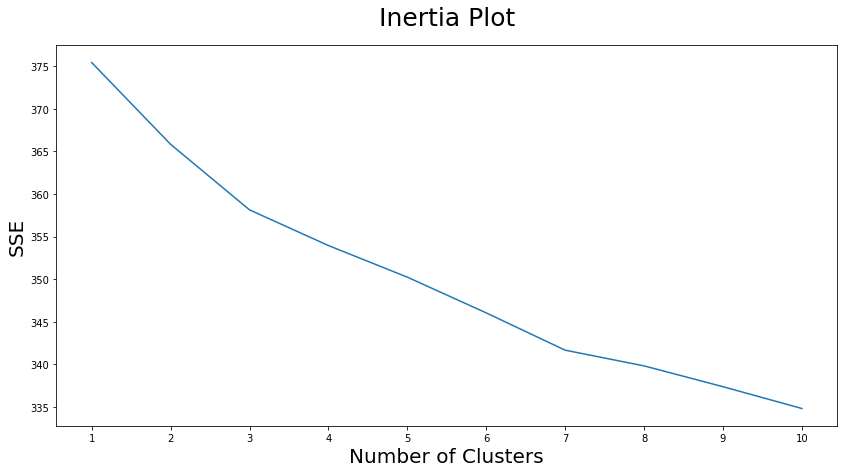

In [6]:
# plot intertia plot
plt.rcParams['figure.figsize'] = [14, 7]
plt.plot(range(1,11), sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters", fontsize = 20)
plt.ylabel("SSE", fontsize = 20)
plt.title('Inertia Plot', fontsize = 25, pad = 20)
plt.show()

## K-Means Clustering

In [7]:
# define k-means model
number_clusters = k1.elbow
model = KMeans(n_clusters =  number_clusters, init = "k-means++", max_iter = 100, n_init = 10, random_state = 42)

# apply model to data
model.fit(vectors)

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [8]:
# assign cluster names
cluster_names = ['finance', 'defence', 'home']

# sort terms in each cluster by frequency
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

# print clusters with top 15 keywords
i = 0
for cluster in order_centroids:
    print ("topic: " +  cluster_names[i])
    print ("keywords:", end = ' ')
    x = 1
    for keyword in cluster[0:15]:
        if x < 15:
            print (vocab[keyword], end = ', ')
            x = x + 1
        else: print (vocab[keyword] + "\n")
    i = i + 1

topic: finance
keywords: economy, question, business, thing, pay, plan, sure, bill, reform, deficit, president_obama, lot, government, cost, company

topic: defence
keywords: isil, security, government, war, region, military, force, continue, peace, support, terrorist, effort, international, include, united_state

topic: home
keywords: life, family, day, love, man, child, veteran, change, great, faith, tonight, thing, story, hope, let

